http://nbviewer.jupyter.org/github/BVLC/caffe/blob/master/examples/00-classification.ipynb

https://prateekvjoshi.com/2016/02/23/deep-learning-with-caffe-in-python-part-iv-classifying-an-image/

In [3]:
import numpy as np
import pandas as pd
import math
import os
from scipy.misc import imread

import keras
from keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
images_dir="../Data/google_image_matching_lsms/"

In [5]:
weights='imagenet'
base_model = keras.applications.resnet50.ResNet50(weights)

In [6]:
#Intermediary Layer 
layer='avg_pool'

In [7]:
model = keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(layer).output)

In [8]:
mu = np.array([103.334, 107.8797, 107.4072])

# Test with One image

In [8]:
img_path = '../Data/google_image_matching/0/25628_8684.jpg'

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


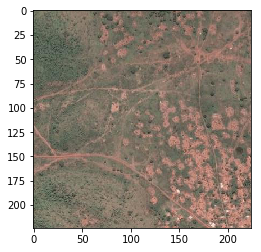

In [16]:
%time
image = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
plt.imshow(image)

In [18]:
image.size

(224, 224)

In [31]:
%time

x = keras.preprocessing.image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [38]:
%time
# obtain the features
features = model.predict(x)
features.shape

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


(1, 1, 1, 2048)

In [42]:
%time
features = features[0,0,0,:]
features.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs


(2048,)

# All images with 1 image per cluster

In [61]:
Final=pd.DataFrame([])

In [44]:
i=0
for root, dirs, files in os.walk(images_dir):
    for name in files:
        if name.endswith(".jpg") : 
            i+=1
            print(i)
            img_path = os.path.join(root, name)
            
            image = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
            
            x = keras.preprocessing.image.img_to_array(image)
            x = np.expand_dims(x, axis=0)
            x = keras.applications.vgg16.preprocess_input(x)

            
            features = model.predict(x)
            features = features[0,0,0,:]
            
            Final[name]=features

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [45]:
Final.shape

(2048, 308)

In [46]:
Final=Final.transpose().reset_index()
Final["i"]=Final["index"].str.slice(0,5)
Final["j"]=Final["index"].str.slice(6,10)

Final["i"]=pd.to_numeric(Final["i"])
Final["j"]=pd.to_numeric(Final["j"])
Final.head()

,index,0,1,2,3,4,5,6,7,8,...,2040,2041,2042,2043,2044,2045,2046,2047,i,j
0,25158_9094.jpg,0.121674,0.013931,0.417280,0.109823,0.013270,0.000000,0.000000,0.000000,0.012985,...,0.000000,0.096169,0.005110,0.036759,0.097603,0.025516,0.000000,0.046152,25158,9094
1,25161_9138.jpg,1.224877,0.288064,1.485905,0.083512,0.085812,0.000000,0.334203,0.000000,0.000000,...,0.000000,0.012429,0.117073,2.284677,0.042515,0.046935,0.000000,0.919881,25161,9138
2,25168_9000.jpg,0.288314,0.587188,0.404129,0.009295,0.000000,0.074375,0.040736,0.000000,1.038108,...,0.173189,0.000000,0.188257,0.028220,0.087348,0.023020,0.000000,0.188370,25168,9000
3,25172_9161.jpg,0.537730,0.757712,0.422355,0.346666,0.000000,0.050807,0.031334,0.000000,0.028684,...,0.137251,1.021267,0.330807,0.321577,0.230520,0.110113,0.001543,0.321501,25172,9161
4,25173_9108.jpg,0.022426,0.264692,0.789431,0.000000,0.239528,0.000000,0.145349,0.004044,0.000000,...,0.027150,0.052458,0.426064,1.534898,0.000000,0.143933,0.042418,0.148767,25173,9108


In [47]:
Final.to_csv("../Data/Intermediate_files/google_sat_CNN_features_lsms_Resnet50_keras_avg_pool.csv")

# All images with 100 images per cluster

In [9]:
images_dir="../Data/googleimage_matchinglsms_10percluster/"

In [10]:
images_dir

'../Data/googleimage_matchinglsms_10percluster/'

In [19]:
def Average_features_dir(image_dir):
    i=0
    features_df=pd.DataFrame([])
    
    for name in os.listdir(image_dir):
        
        if i==3:
            break
            
        if name.endswith(".jpg") : 
            i+=1
            img_path = os.path.join(image_dir, name)
            print (img_path)
            
            image = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
            
            x = keras.preprocessing.image.img_to_array(image)
            x = np.expand_dims(x, axis=0)
            x = keras.applications.vgg16.preprocess_input(x)

            
            features = model.predict(x)
            features = features[0,0,0,:]
            
            features_df[name]=features
    
    avg_features=features_df.mean(axis=1)

    return avg_features

In [20]:
i=0
Final=pd.DataFrame([])
for name in os.listdir(images_dir):
    i+=1
    if len(name)==10:
        print(i)
        Final[name]=Average_features_dir(os.path.join(images_dir, name))

2
../Data/googleimage_matchinglsms_10percluster/25158_9094/25153_9089.jpg
../Data/googleimage_matchinglsms_10percluster/25158_9094/25153_9090.jpg
../Data/googleimage_matchinglsms_10percluster/25158_9094/25153_9091.jpg
3
../Data/googleimage_matchinglsms_10percluster/25161_9138/25156_9133.jpg
../Data/googleimage_matchinglsms_10percluster/25161_9138/25156_9134.jpg
../Data/googleimage_matchinglsms_10percluster/25161_9138/25156_9135.jpg
4
../Data/googleimage_matchinglsms_10percluster/25168_9000/25163_8995.jpg
../Data/googleimage_matchinglsms_10percluster/25168_9000/25163_8996.jpg
../Data/googleimage_matchinglsms_10percluster/25168_9000/25163_8997.jpg
5
../Data/googleimage_matchinglsms_10percluster/25172_9161/25167_9156.jpg
../Data/googleimage_matchinglsms_10percluster/25172_9161/25167_9157.jpg
../Data/googleimage_matchinglsms_10percluster/25172_9161/25167_9158 (1).jpg
6
../Data/googleimage_matchinglsms_10percluster/25173_9108/25168_9103.jpg
../Data/googleimage_matchinglsms_10percluster/2517

../Data/googleimage_matchinglsms_10percluster/25255_9118/25250_9115.jpg
40
../Data/googleimage_matchinglsms_10percluster/25257_8929/25252_8924.jpg
../Data/googleimage_matchinglsms_10percluster/25257_8929/25252_8925.jpg
../Data/googleimage_matchinglsms_10percluster/25257_8929/25252_8926.jpg
41
../Data/googleimage_matchinglsms_10percluster/25257_9016/25252_9011.jpg
../Data/googleimage_matchinglsms_10percluster/25257_9016/25252_9012.jpg
../Data/googleimage_matchinglsms_10percluster/25257_9016/25252_9013.jpg
42
../Data/googleimage_matchinglsms_10percluster/25258_8953/25253_8948.jpg
../Data/googleimage_matchinglsms_10percluster/25258_8953/25253_8949.jpg
../Data/googleimage_matchinglsms_10percluster/25258_8953/25253_8950.jpg
43
../Data/googleimage_matchinglsms_10percluster/25259_8983/25254_8978.jpg
../Data/googleimage_matchinglsms_10percluster/25259_8983/25254_8979.jpg
../Data/googleimage_matchinglsms_10percluster/25259_8983/25254_8980.jpg
44
../Data/googleimage_matchinglsms_10percluster/252

../Data/googleimage_matchinglsms_10percluster/25329_8890/25324_8886.jpg
../Data/googleimage_matchinglsms_10percluster/25329_8890/25324_8887.jpg
78
../Data/googleimage_matchinglsms_10percluster/25331_8701/25326_8696.jpg
../Data/googleimage_matchinglsms_10percluster/25331_8701/25326_8697.jpg
../Data/googleimage_matchinglsms_10percluster/25331_8701/25326_8698.jpg
79
../Data/googleimage_matchinglsms_10percluster/25335_8878/25330_8873.jpg
../Data/googleimage_matchinglsms_10percluster/25335_8878/25330_8874.jpg
../Data/googleimage_matchinglsms_10percluster/25335_8878/25330_8875.jpg
80
../Data/googleimage_matchinglsms_10percluster/25336_8571/25331_8566.jpg
../Data/googleimage_matchinglsms_10percluster/25336_8571/25331_8567.jpg
../Data/googleimage_matchinglsms_10percluster/25336_8571/25331_8568.jpg
81
../Data/googleimage_matchinglsms_10percluster/25337_8686/25332_8681.jpg
../Data/googleimage_matchinglsms_10percluster/25337_8686/25332_8682.jpg
../Data/googleimage_matchinglsms_10percluster/25337_

../Data/googleimage_matchinglsms_10percluster/25405_9106/25400_9103.jpg
115
../Data/googleimage_matchinglsms_10percluster/25406_8577/25401_8572.jpg
../Data/googleimage_matchinglsms_10percluster/25406_8577/25401_8573.jpg
../Data/googleimage_matchinglsms_10percluster/25406_8577/25401_8574.jpg
116
../Data/googleimage_matchinglsms_10percluster/25406_8930/25401_8925.jpg
../Data/googleimage_matchinglsms_10percluster/25406_8930/25401_8926.jpg
../Data/googleimage_matchinglsms_10percluster/25406_8930/25401_8927.jpg
117
../Data/googleimage_matchinglsms_10percluster/25407_9041/25402_9036.jpg
../Data/googleimage_matchinglsms_10percluster/25407_9041/25402_9037.jpg
../Data/googleimage_matchinglsms_10percluster/25407_9041/25402_9038.jpg
118
../Data/googleimage_matchinglsms_10percluster/25411_8987/25406_8982.jpg
../Data/googleimage_matchinglsms_10percluster/25411_8987/25406_8983.jpg
../Data/googleimage_matchinglsms_10percluster/25411_8987/25406_8984.jpg
119
../Data/googleimage_matchinglsms_10percluste

152
../Data/googleimage_matchinglsms_10percluster/25503_8963/25498_8958.jpg
../Data/googleimage_matchinglsms_10percluster/25503_8963/25498_8959.jpg
../Data/googleimage_matchinglsms_10percluster/25503_8963/25498_8960.jpg
153
../Data/googleimage_matchinglsms_10percluster/25504_8742/25499_8737.jpg
../Data/googleimage_matchinglsms_10percluster/25504_8742/25499_8738.jpg
../Data/googleimage_matchinglsms_10percluster/25504_8742/25499_8739.jpg
154
../Data/googleimage_matchinglsms_10percluster/25504_8763/25499_8758.jpg
../Data/googleimage_matchinglsms_10percluster/25504_8763/25499_8759.jpg
../Data/googleimage_matchinglsms_10percluster/25504_8763/25499_8760 (1).jpg
155
../Data/googleimage_matchinglsms_10percluster/25504_8915/25499_8910.jpg
../Data/googleimage_matchinglsms_10percluster/25504_8915/25499_8911.jpg
../Data/googleimage_matchinglsms_10percluster/25504_8915/25499_8912.jpg
156
../Data/googleimage_matchinglsms_10percluster/25504_8955/25499_8950.jpg
../Data/googleimage_matchinglsms_10percl

../Data/googleimage_matchinglsms_10percluster/25515_8967/25510_8963.jpg
../Data/googleimage_matchinglsms_10percluster/25515_8967/25510_8964.jpg
190
../Data/googleimage_matchinglsms_10percluster/25516_8961/25511_8956.jpg
../Data/googleimage_matchinglsms_10percluster/25516_8961/25511_8957.jpg
../Data/googleimage_matchinglsms_10percluster/25516_8961/25511_8958.jpg
191
../Data/googleimage_matchinglsms_10percluster/25518_8742/25513_8737.jpg
../Data/googleimage_matchinglsms_10percluster/25518_8742/25513_8738.jpg
../Data/googleimage_matchinglsms_10percluster/25518_8742/25513_8739.jpg
192
../Data/googleimage_matchinglsms_10percluster/25520_8958/25515_8953.jpg
../Data/googleimage_matchinglsms_10percluster/25520_8958/25515_8954.jpg
../Data/googleimage_matchinglsms_10percluster/25520_8958/25515_8955.jpg
193
../Data/googleimage_matchinglsms_10percluster/25522_8958/25517_8953.jpg
../Data/googleimage_matchinglsms_10percluster/25522_8958/25517_8954.jpg
../Data/googleimage_matchinglsms_10percluster/25

../Data/googleimage_matchinglsms_10percluster/25577_8951/25572_8947.jpg
227
../Data/googleimage_matchinglsms_10percluster/25579_8962/25574_8957.jpg
../Data/googleimage_matchinglsms_10percluster/25579_8962/25574_8958.jpg
../Data/googleimage_matchinglsms_10percluster/25579_8962/25574_8959.jpg
228
../Data/googleimage_matchinglsms_10percluster/25581_8735/25576_8730.jpg
../Data/googleimage_matchinglsms_10percluster/25581_8735/25576_8731.jpg
../Data/googleimage_matchinglsms_10percluster/25581_8735/25576_8732.jpg
229
../Data/googleimage_matchinglsms_10percluster/25582_8956/25577_8951.jpg
../Data/googleimage_matchinglsms_10percluster/25582_8956/25577_8952.jpg
../Data/googleimage_matchinglsms_10percluster/25582_8956/25577_8953.jpg
230
../Data/googleimage_matchinglsms_10percluster/25583_8745/25578_8740.jpg
../Data/googleimage_matchinglsms_10percluster/25583_8745/25578_8741.jpg
../Data/googleimage_matchinglsms_10percluster/25583_8745/25578_8742.jpg
231
../Data/googleimage_matchinglsms_10percluste

264
../Data/googleimage_matchinglsms_10percluster/25669_8835/25664_8830.jpg
../Data/googleimage_matchinglsms_10percluster/25669_8835/25664_8831.jpg
../Data/googleimage_matchinglsms_10percluster/25669_8835/25664_8832.jpg
265
../Data/googleimage_matchinglsms_10percluster/25670_8823/25665_8818.jpg
../Data/googleimage_matchinglsms_10percluster/25670_8823/25665_8819.jpg
../Data/googleimage_matchinglsms_10percluster/25670_8823/25665_8820.jpg
266
../Data/googleimage_matchinglsms_10percluster/25670_8862/25665_8857.jpg
../Data/googleimage_matchinglsms_10percluster/25670_8862/25665_8858.jpg
../Data/googleimage_matchinglsms_10percluster/25670_8862/25665_8859.jpg
267
../Data/googleimage_matchinglsms_10percluster/25674_8776/25669_8771.jpg
../Data/googleimage_matchinglsms_10percluster/25674_8776/25669_8772.jpg
../Data/googleimage_matchinglsms_10percluster/25674_8776/25669_8773 (1).jpg
268
../Data/googleimage_matchinglsms_10percluster/25676_8557/25671_8552.jpg
../Data/googleimage_matchinglsms_10percl

../Data/googleimage_matchinglsms_10percluster/25726_8894/25721_8890.jpg
../Data/googleimage_matchinglsms_10percluster/25726_8894/25721_8891.jpg
302
../Data/googleimage_matchinglsms_10percluster/25726_8896/25721_8891.jpg
../Data/googleimage_matchinglsms_10percluster/25726_8896/25721_8892.jpg
../Data/googleimage_matchinglsms_10percluster/25726_8896/25721_8893.jpg
303
../Data/googleimage_matchinglsms_10percluster/25729_8834/25724_8829.jpg
../Data/googleimage_matchinglsms_10percluster/25729_8834/25724_8830.jpg
../Data/googleimage_matchinglsms_10percluster/25729_8834/25724_8831.jpg
304
../Data/googleimage_matchinglsms_10percluster/25740_8715/25735_8710.jpg
../Data/googleimage_matchinglsms_10percluster/25740_8715/25735_8711.jpg
../Data/googleimage_matchinglsms_10percluster/25740_8715/25735_8712.jpg
305
../Data/googleimage_matchinglsms_10percluster/25750_8717/25745_8712.jpg
../Data/googleimage_matchinglsms_10percluster/25750_8717/25745_8713.jpg
../Data/googleimage_matchinglsms_10percluster/25

In [21]:
Final.shape

(2048, 308)

In [22]:
Final=Final.transpose().reset_index()
Final["i"]=Final["index"].str.slice(0,5)
Final["j"]=Final["index"].str.slice(6,10)

Final["i"]=pd.to_numeric(Final["i"])
Final["j"]=pd.to_numeric(Final["j"])
Final.head()

,index,0,1,2,3,4,5,6,7,8,...,2040,2041,2042,2043,2044,2045,2046,2047,i,j
0,25158_9094,0.637386,0.187743,0.542141,0.186537,0.235864,0.075991,0.193866,0.084231,0.016035,...,0.006795,0.050585,0.263434,0.741846,0.002429,0.400112,0.010079,0.306538,25158,9094
1,25161_9138,0.258713,0.467569,0.762632,0.155659,0.008294,0.000550,0.046818,0.000000,0.025621,...,0.001244,0.129112,0.022885,1.074406,0.000000,0.256993,0.048855,0.140319,25161,9138
2,25168_9000,0.644203,0.000597,0.059925,0.277867,0.103987,0.000000,0.107368,0.200474,0.000468,...,0.006956,0.008457,0.000000,0.066038,0.000000,2.836791,0.000000,0.358666,25168,9000
3,25172_9161,0.259410,0.487492,0.108211,0.067118,0.016997,0.072476,0.202914,0.007067,0.035568,...,0.244533,0.011293,0.057271,0.674795,0.179175,0.069035,0.026464,0.130034,25172,9161
4,25173_9108,0.266109,0.697777,1.655825,0.149894,0.203437,0.074811,0.056102,0.000952,0.036517,...,0.518434,0.089971,0.454403,0.438098,0.025787,0.534346,0.185180,0.016211,25173,9108


In [23]:
Final.to_csv("../Data/Intermediate_files/google_sat_CNN_features_lsms_Resnet50_keras_avg_pool_3imagescluster.csv")